# Solar power in a nuclear winter

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../src")
from analysis import GEM, waccm, waccmdaily

Let's look at some maps for fun

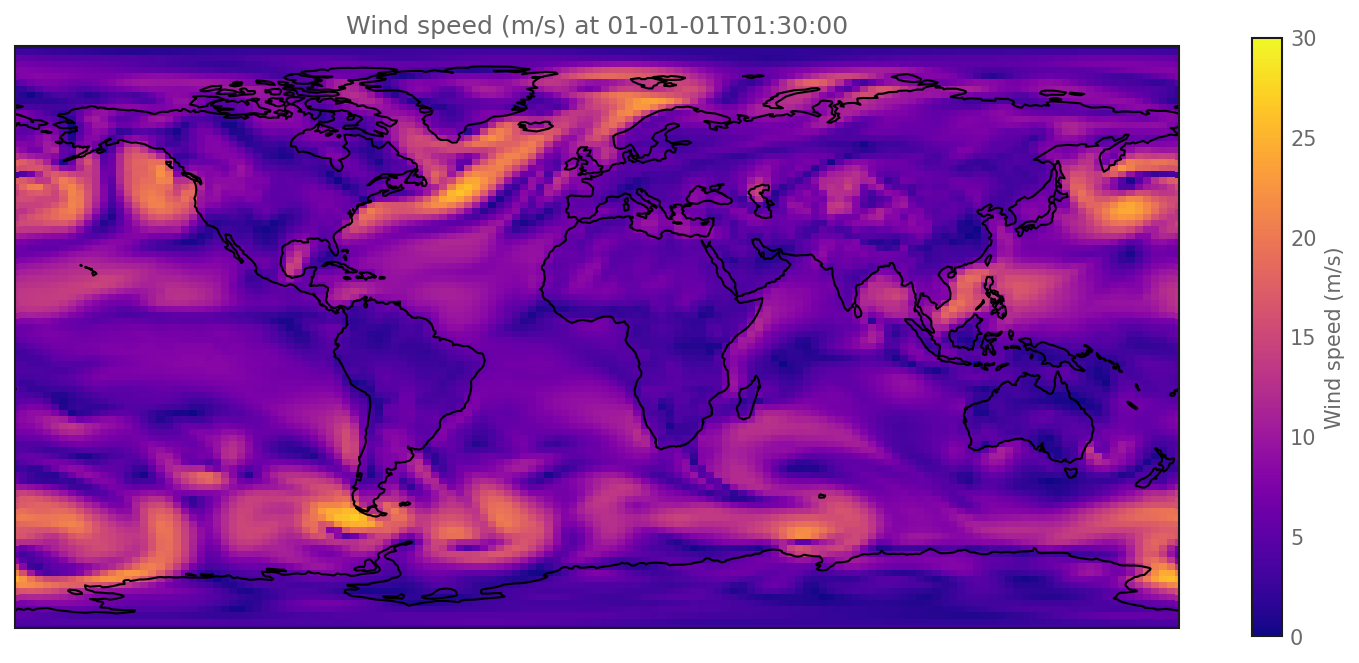

In [ ]:
waccmdaily.plot_map("windspeed", "01-01-01T01:30:00", zmin=0, zmax=30)

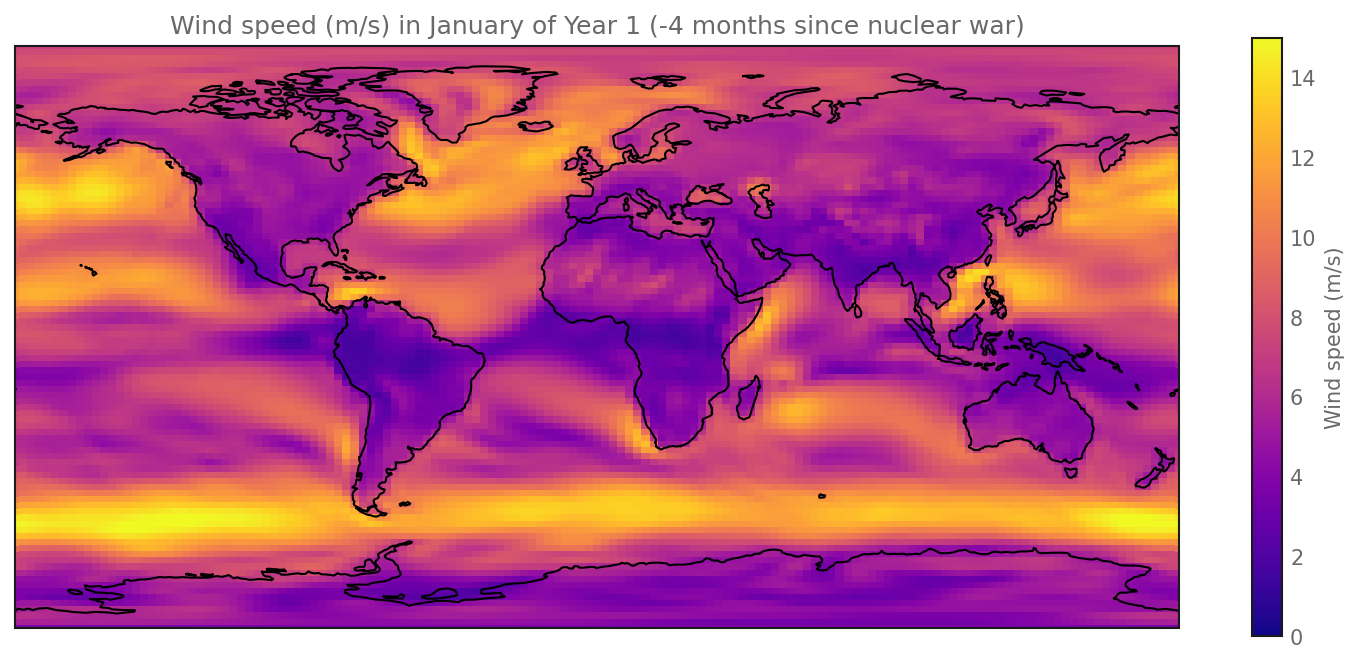

In [22]:
waccmdaily.plot_map("windspeed", "01-01", zmin=0, zmax=15)

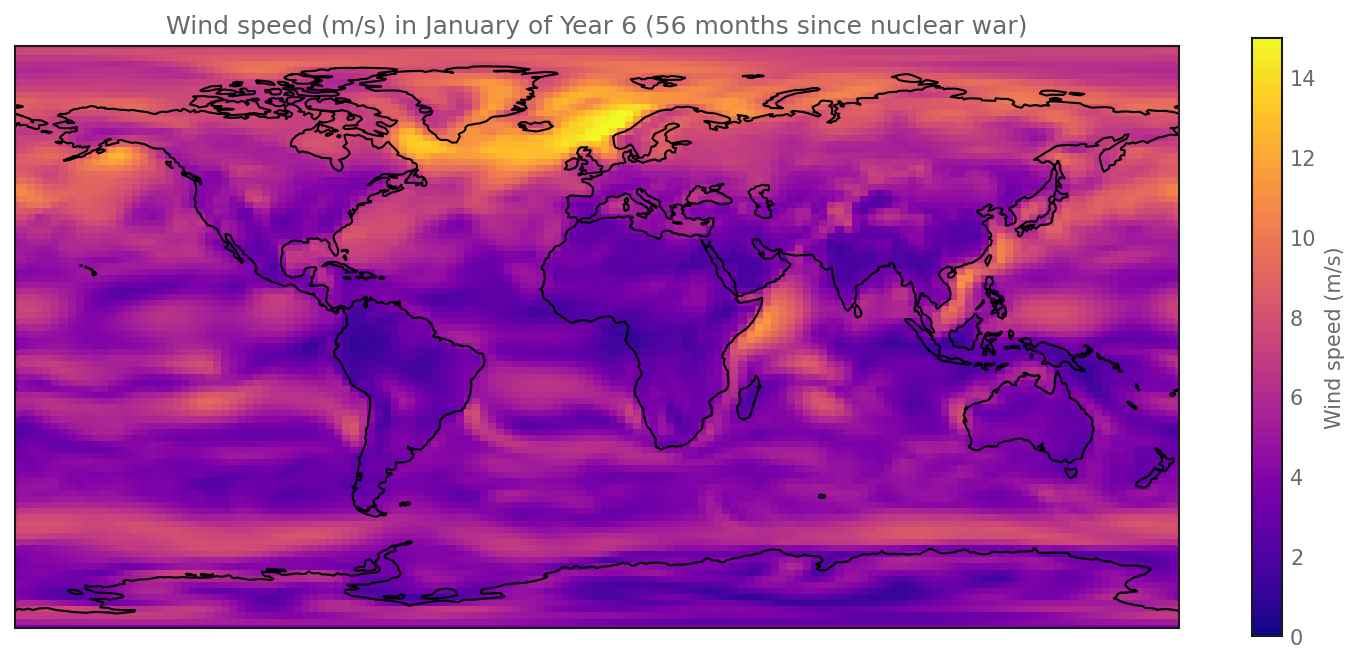

In [23]:
waccmdaily.plot_map("windspeed", "06-01", zmin=0, zmax=15)

We can clearly see the drop in wind speed after the onset of the nuclear winter.

Now let's take a look at the wind farm data.

In [24]:
gem = GEM()

We make a quick check to make sure the data makes sense. I am comparing the total *operating* wind capacity to reference values below. It all looks ok.

In [30]:
gem.sum_operating_wind_farms_per_country()

Country
China             342693.0
United States     144962.0
Germany            43875.0
India              35421.8
United Kingdom     28374.5
Name: Capacity (MW), dtype: float64

* China, 2021: 328 GW (https://en.wikipedia.org/wiki/Wind_power_in_China)
* US, 2022: 141 GW (https://en.wikipedia.org/wiki/Wind_power_in_the_United_States)
* Germany, 2021: 64 GW (https://en.wikipedia.org/wiki/Wind_power_in_Germany)
* India, 022, 42 GW (https://en.wikipedia.org/wiki/Wind_power_in_India)
* UK, 2022, 29 GW (https://en.wikipedia.org/wiki/Wind_power_in_the_United_Kingdom)